## Deep Learning and Computer Vision

### Training a small network

Shani Israelov

Jean Monnet University, 2023

The aim of this exercise is to train a small network with dense layers for the classification of
handwritten digits. We are using the MNIST dataset, composed of 70,000 images: 60,000 for
training and 10,000 for testing. This is a classification problem with 10 categories

0/ Run the provided codes (Keras and Pytorch).

In [1]:
from keras.datasets import mnist     
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.utils import np_utils
from keras.optimizers import gradient_descent_v2
import matplotlib.pyplot as plt
import numpy as np

# Parameters
Sbatch=128
Nepochs=10
lr=1

# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Image Preprocessing
X_train = X_train.astype('float32')  
X_test = X_test.astype('float32')
X_train /= 255                     
X_test /= 255

# Labels
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Create the Network
model = Sequential()
model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# Loss and optimizer
model.compile(loss='categorical_crossentropy', optimizer=gradient_descent_v2.SGD(learning_rate=lr), metrics=['accuracy'])

# Training
model.fit(X_train, Y_train, batch_size=Sbatch, epochs=Nepochs, verbose=1)

# Test
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.4373 - accuracy: 0.8764
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3109 - accuracy: 0.9105
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2978 - accuracy: 0.9156
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2898 - accuracy: 0.9182
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2850 - accuracy: 0.9193
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2808 - accuracy: 0.9210
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2782 - accuracy: 0.9219
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2763 - accuracy: 0.9222
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2723 - accuracy: 0.9244
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2906 - accuracy: 0.9169

Questions about the Keras code (if you have time, you can do that again on the Pytorch code, after):

1/ What is the size of each image ?

In [2]:
print("The size of each image is:", X_train[0,:].shape)

The size of each image is: (28, 28)


2/ Display some labels before and after the function ‘to_categorical’.

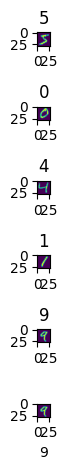

In [19]:
fig, axs = plt.subplots(6,1)
for i in range(5):
    plt.imshow(X_train[i,:]/255.)
    plt.xlabel(y_train[i])
    axs[i].imshow(X_train[i,:]/255.)
    axs[i].set_title(str(y_train[i]))
fig.tight_layout()

3/ What is the aim of the ‘Flatten’ function ?

*Answer:* 

Flattens the input. Does not affect the batch size. if the input is size (1, 10, 64) after Flatten() it would be 640

4/ How many layers do we have in the current network ?

*Answer:*

Only 1, the Dense layer.

Sequential() groups a linear stack of layers into a tf.keras.Model,

Flatten() flattens the input, 

Dense() is just your regular densely-connected NN layer,

Activation('softmax') returns values in range (0,1).

5/ How many weights to be learned ?

*Answer:*

Dense() is getting as an input the Flatten() result. since the data is of size 28x28, the Flatten result would be 784.

6/ What are the loss function, the optimization algorithm and its parameter(s) ?


*Answer:*

'
model.compile(loss='categorical_crossentropy', optimizer=gradient_descent_v2.SGD(learning_rate=lr), metrics=['accuracy'])
'

loss='categorical_crossentropy'

the loss function is used to compute the quantity that the the model should seek to minimize during training. For regression models, the commonly used loss function used is mean squared error function while for classification models predicting the probability, the loss function most commonly used is cross entropy.
categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels. The output label is assigned one-hot category encoding value in form of 0s and 1. The output label, if present in integer form, is converted into categorical encoding using keras.utils to_categorical method.


optimizer=gradient_descent_v2.SGD(learning_rate=lr)

An optimizer is one of the two arguments required for compiling a Keras model.
SGD is Stochastic gradient descent optimizer.
update rule for parameter w with gradient g when momentum is 0:
w = w - learning_rate * g


7/ What does ‘469/469’ mean in the output results ?


*Answer:*

training_data_size divided by batch_size.

The batch size is a hyperparameter of gradient descent that controls the number of training samples to work through before the model’s internal parameters are updated.

in each epoc, we go through out all the training set, meaning we go over 128 samples 469 times. 



In [20]:
X_train.shape[0]/Sbatch


468.75

8/ Observe the prediction for the first test image and compare it with the actual label. Display the
first test image

In [22]:
predictions = model.predict(X_test[3, :, :])
print("predictions shape:", predictions.shape)

ValueError: in user code:

    File "c:\Users\Shani\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\Shani\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Shani\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\Shani\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
        return self(x, training=False)
    File "c:\Users\Shani\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Shani\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 277, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 784, but received input with shape (None, 28)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 28), dtype=float32)
      • training=False
      • mask=None


9/ Display the learned weights of each neuron as an image.


10/ Insert FC layers (no convolution) and observe the results.


11/ Change the learning rate and observe the impact on the results. Do not touch the batch size or
the epoch number yet.

12/ Apply a 5-fold cross validation to tune the learning rate.


13/ Provide your best architecture and the number of learned weights.


14/ Try different batch sizes and explain the influence on accuracy and training time.